In [2]:
import sys
import os
import pandas as pd
import numpy as np
import random
sys.path.append("../")


In [3]:
def resample_data(df, time_window):
    print(f"[*] Resampling data based on {time_window} time window")
    df_remove_dup = df.drop_duplicates('time', keep='first', inplace=False, ignore_index=True)
    resampled_data = pd.DataFrame()
    resampler = df_remove_dup.set_index('time').resample(time_window)
    resampled_groups = resampler.groups
    for key in resampled_groups:
        indices = resampler._get_index(key)
        # If there are values in the group bin
        if len(indices):
            # Pick a random value from the group
            indx_choice = [np.random.choice(indices)]
            # Get the picked value from df
            value_df = df_remove_dup.take(indx_choice)
            resampled_data = pd.concat([resampled_data, value_df])      
    print("Done")
    return resampled_data

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
path="gdrive/My Drive/Colab Notebooks/Big_Data_AQI_Estimation-master/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=20, 20

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# MNR Data set

**2. Merged_data_processed**

In [6]:
#step 1: read data
MNR_data_path = path + "Data Processed/MNR Processed/Merged_With_Image_Features"

model_folder = "ssd_resnet152_v1_fpn_1024x1024_coco17_tpu-8" #or efficientdet_d7_coco17_tpu-32

MNR_merged_data_raw = pd.read_csv(os.path.join(MNR_data_path, model_folder, "MNR_merged_data_raw.csv"))
MNR_merged_data_processed = pd.read_csv(os.path.join(MNR_data_path, model_folder, "MNR_merged_data_processed.csv"))
MNR_merged_data_labels = pd.read_csv(os.path.join(MNR_data_path, model_folder, "MNR_merged_data_labels.csv"))

In [7]:
MNR_merged_data_processed.head()

,timestamp,image_folder_path,image,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,uv,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast
0,2020-02-28 07:53:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582851237.jpg,3.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,82.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,2.623831,14,11,3,67.389644
1,2020-02-28 07:58:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582851567.jpg,5.0,4.0,3.0,3.0,2.0,3.0,4.0,4.0,79.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,2.307241,8,7,3,56.081927
2,2020-02-28 08:02:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852124.jpg,2.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,81.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,2.307241,15,8,1,69.403899
3,2020-02-28 08:13:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852513.jpg,2.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,82.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,4.198610,8,5,0,82.516990
4,2020-02-28 08:17:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852742.jpg,5.0,5.0,3.0,3.0,4.0,4.0,4.0,4.0,80.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,4.198610,3,2,0,64.668396


In [8]:
MNR_merged_data_labels.head()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,0,0.0,62.0,132.0,4.0,29.0,0,7.0,184.978102,3
1,0,0.0,72.0,148.0,4.0,27.0,0,8.0,193.153285,3
2,0,0.0,72.0,148.0,4.0,28.0,0,8.0,193.153285,3
3,0,0.0,62.0,132.0,5.0,31.0,0,8.0,184.978102,3
4,0,0.0,64.0,132.0,4.0,26.0,0,8.0,184.978102,3


In [9]:
#Step 2: Statistical Analysis
MNR_merged_data_processed.describe()

,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,uv,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,2.488136,2.850847,3.915254,3.871186,3.274576,3.155932,3.088136,3.145763,75.172881,33.555932,0.054237,0.342373,0.264407,0.393220,0.383051,0.616949,3.451992,7.166102,5.277966,1.569492,67.697510
std,1.049309,0.759156,0.866774,0.886607,0.908687,0.792883,0.781827,0.805450,13.788759,3.980748,0.226870,0.475310,0.441766,0.489295,0.486957,0.486957,1.095210,3.682493,2.807429,1.496396,9.662188
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,33.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609376,0.000000,0.000000,0.000000,3.546449
25%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,67.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.398516,5.000000,3.000000,0.000000,61.701952
50%,2.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,76.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.368046,7.000000,5.000000,1.000000,67.389644
75%,3.000000,3.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,84.500000,37.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.656438,9.000000,7.000000,2.000000,74.425678
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,99.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.225498,21.000000,14.000000,8.000000,89.201138


In [10]:
MNR_merged_data_labels.describe()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
count,295.0,295.0,295.000000,295.000000,295.000000,295.000000,295.0,295.000000,295.000000,295.000000
mean,0.0,0.0,62.983051,124.705085,4.786441,20.596610,0.0,8.610169,181.567808,3.071186
std,0.0,0.0,17.146717,32.009211,1.903761,4.556149,0.0,0.787162,18.665867,0.410347
min,0.0,0.0,30.000000,48.000000,2.000000,10.000000,0.0,7.000000,120.444444,2.000000
25%,0.0,0.0,53.000000,112.000000,4.000000,17.000000,0.0,8.000000,174.759124,3.000000
50%,0.0,0.0,64.000000,128.000000,4.000000,20.000000,0.0,9.000000,182.934307,3.000000
75%,0.0,0.0,74.000000,144.000000,5.000000,24.000000,0.0,9.000000,191.109489,3.000000
max,0.0,0.0,126.000000,236.000000,14.000000,40.000000,0.0,10.000000,242.936937,4.000000


In [11]:
#Step 3: Plotting Statistics
# Combine labels with data
MNR_merged_data_processed_combine = pd.concat([MNR_merged_data_processed, MNR_merged_data_labels], axis=1)

In [12]:
MNR_merged_data_processed_combine.isnull().sum()

timestamp                0
image_folder_path        0
image                    0
greenness degree         0
cleanliness degree       0
crowdedness degree       0
noisy degree             0
skin feeling degree      0
stress degree            0
personal aqi degree      0
safety degree            0
hum                      0
tem                      0
uv                       0
part_of_day_Afternoon    0
part_of_day_Evening      0
part_of_day_Morning      0
Not rush hour            0
Rush hour                0
distance_to_airport      0
num_people               0
num_motorcycles          0
num_cars                 0
rms_contrast             0
o3_8                     0
o3                       0
pm10                     0
pm25                     0
co                       0
so2                      0
so2_24                   0
no2                      0
aqi                      0
aqi_rank                 0
dtype: int64

In [13]:
MNR_merged_data_processed_combine.head()

,timestamp,image_folder_path,image,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,uv,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,2020-02-28 07:53:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582851237.jpg,3.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,82.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,2.623831,14,11,3,67.389644,0,0.0,62.0,132.0,4.0,29.0,0,7.0,184.978102,3
1,2020-02-28 07:58:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582851567.jpg,5.0,4.0,3.0,3.0,2.0,3.0,4.0,4.0,79.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,2.307241,8,7,3,56.081927,0,0.0,72.0,148.0,4.0,27.0,0,8.0,193.153285,3
2,2020-02-28 08:02:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852124.jpg,2.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,81.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,2.307241,15,8,1,69.403899,0,0.0,72.0,148.0,4.0,28.0,0,8.0,193.153285,3
3,2020-02-28 08:13:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852513.jpg,2.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,82.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,4.198610,8,5,0,82.516990,0,0.0,62.0,132.0,5.0,31.0,0,8.0,184.978102,3
4,2020-02-28 08:17:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852742.jpg,5.0,5.0,3.0,3.0,4.0,4.0,4.0,4.0,80.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,4.198610,3,2,0,64.668396,0,0.0,64.0,132.0,4.0,26.0,0,8.0,184.978102,3


In [14]:
# Compute the correlation between our features with aqi values and aqi ranks
# First need to drop unecessary columns
# Here we remove all columns that we are not used as features in the models
MNR_merged_data_processed_combine_drop = MNR_merged_data_processed_combine.drop(columns=\
                                                                                        ["timestamp", "image_folder_path", "image", "o3_8", "o3", "pm10", \
                                                                                         "pm25", "co", "so2", "so2_24", "uv", "no2"])
aqi_values = MNR_merged_data_processed_combine_drop[["aqi"]]
aqi_ranks = MNR_merged_data_processed_combine_drop[["aqi_rank"]]

corr_matrix = MNR_merged_data_processed_combine_drop.corr()

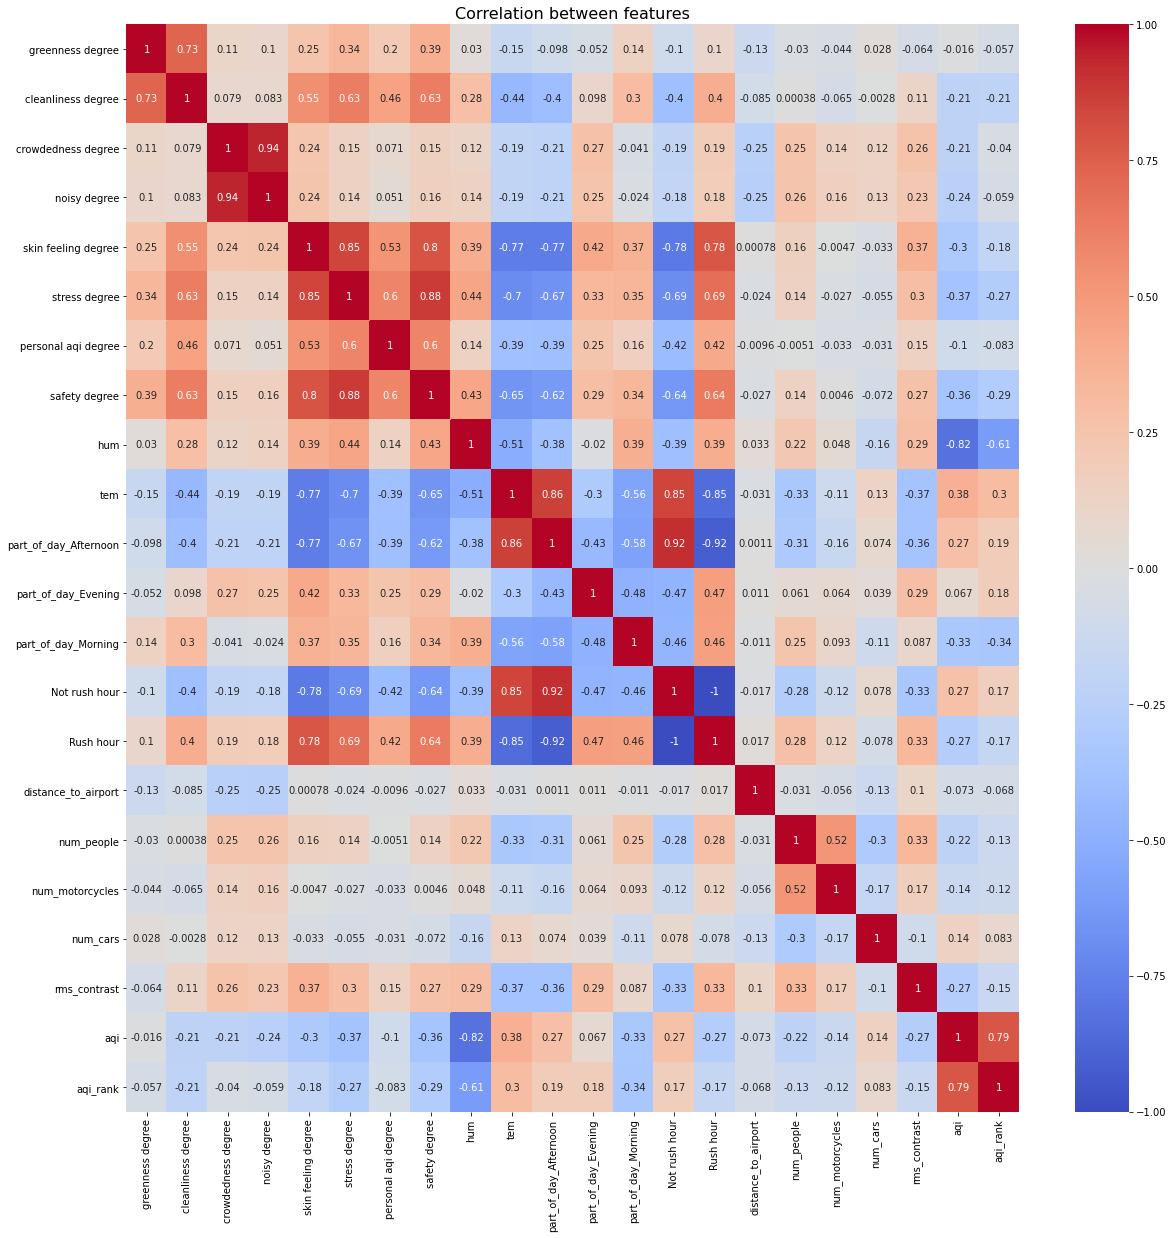

In [15]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between features', fontsize=16)
plt.show()

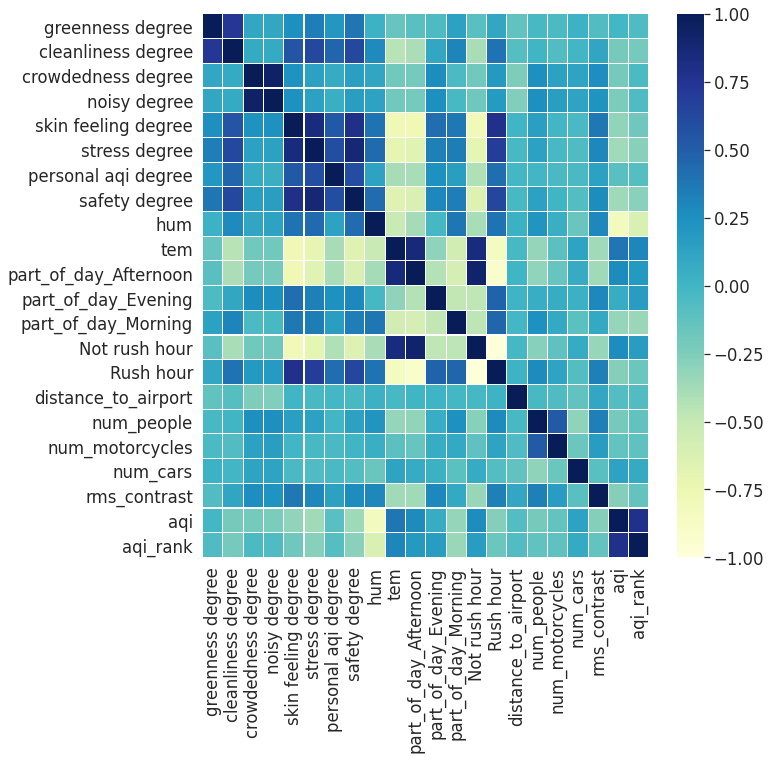

In [49]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize =(10, 10)) 
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [17]:
line_colors = [(31,119,180), (255, 127, 14), (44, 160, 44), (214, 39, 40), (148, 103, 189), 
             (177, 3, 24), (0, 107 , 164), (65, 68, 81)]
             
scatter_colors = [(174,199,232), (255,187,120), (152,223,138), (255,152,150), 
                  (197,176,213), (196,156,148), (247,182,210), (199,199,199), 
                  (158,218,229)]
  
# Rescale to values between 0 and 1 
for i in range(len(line_colors)):  
    r, g, b = line_colors[i]  
    line_colors[i] = (r / 255., g / 255., b / 255.)
for i in range(len(scatter_colors)):  
    r, g, b = scatter_colors[i]  
    scatter_colors[i] = (r / 255., g / 255., b / 255.)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


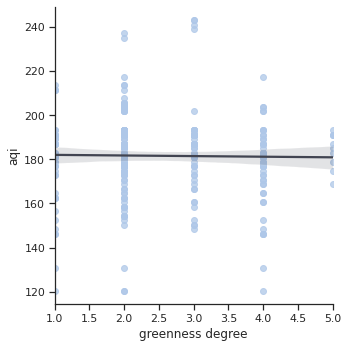

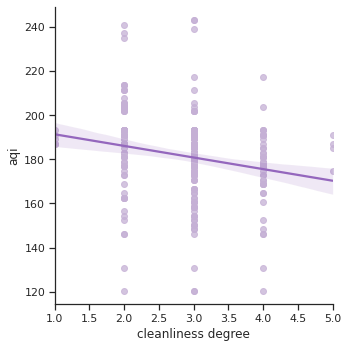

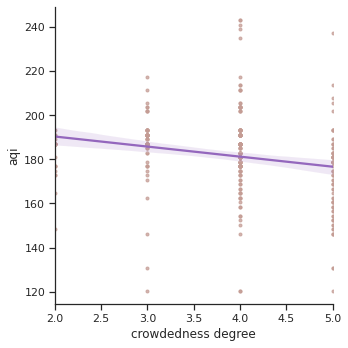

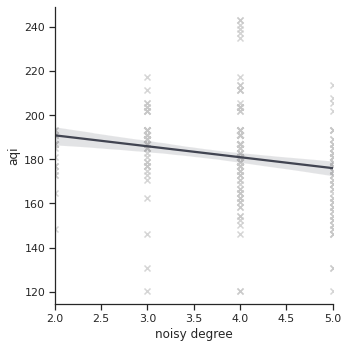

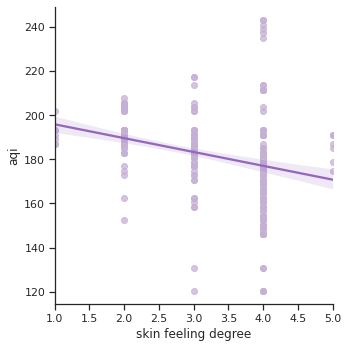

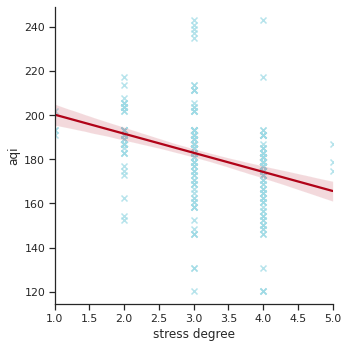

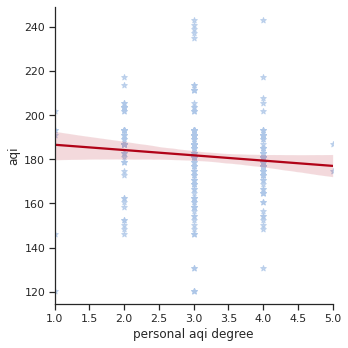

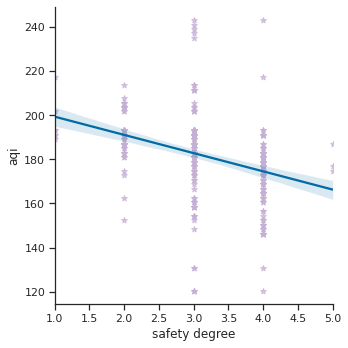

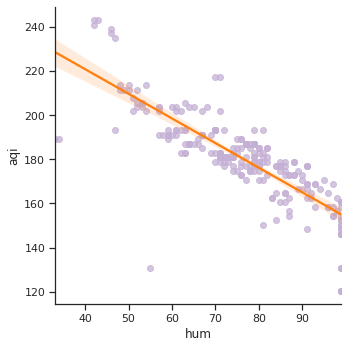

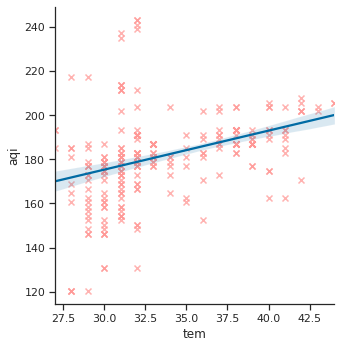

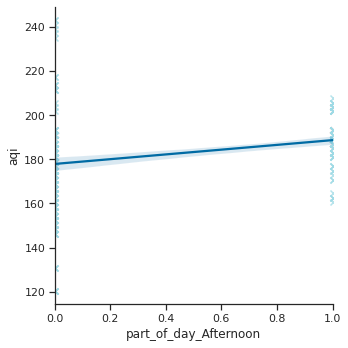

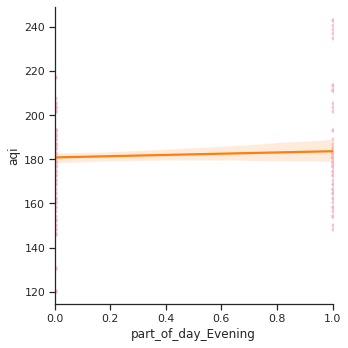

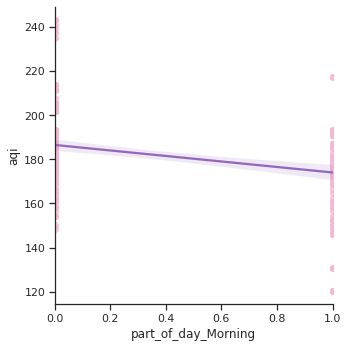

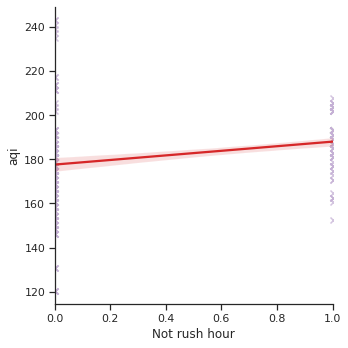

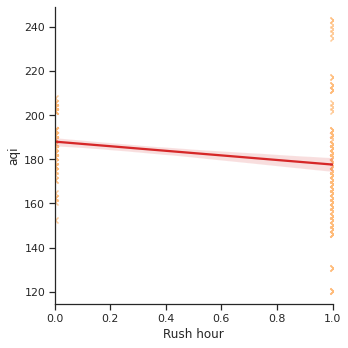

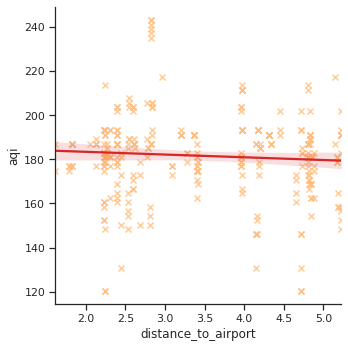

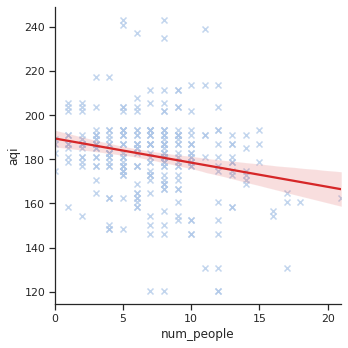

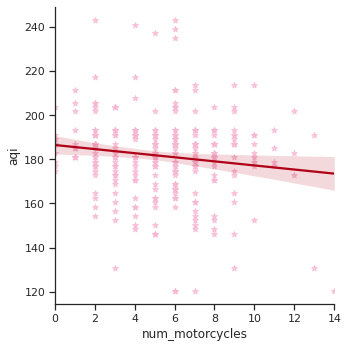

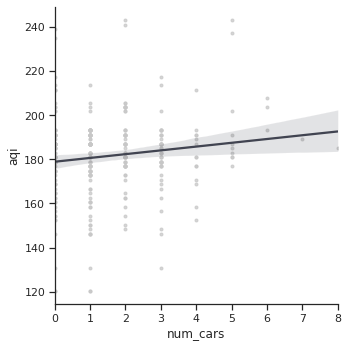

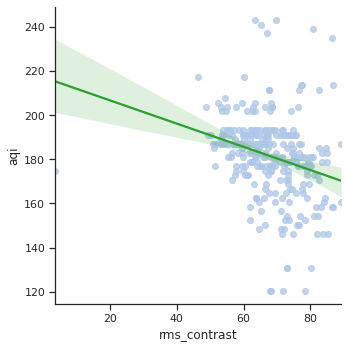

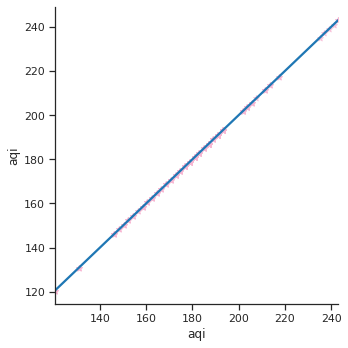

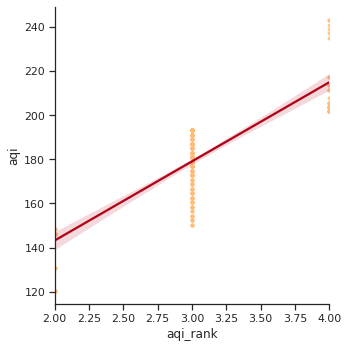

In [18]:
marker_list = ['x', 'o', '*','.']
sns.set(style='ticks', color_codes=True)
for i in MNR_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1) 
    sns.lmplot(x=i, y='aqi', data = MNR_merged_data_processed_combine_drop, 
               scatter_kws = {'color':scatter_colors[a], 'alpha': 0.75}, line_kws={'color': line_colors[b]}, markers=marker_list[c])


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


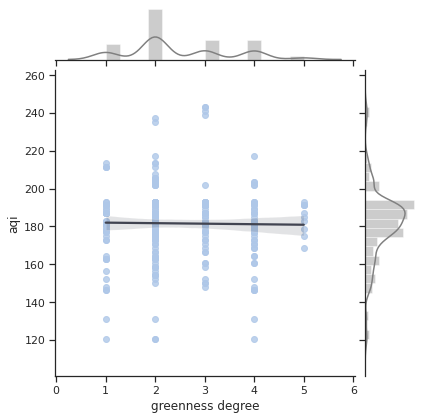

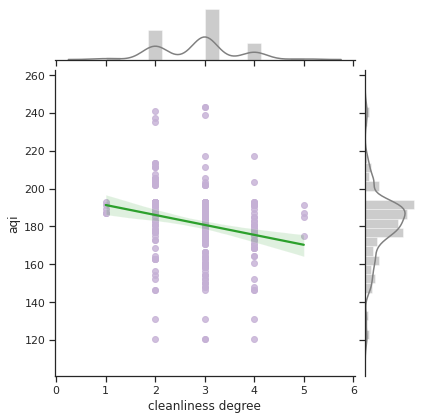

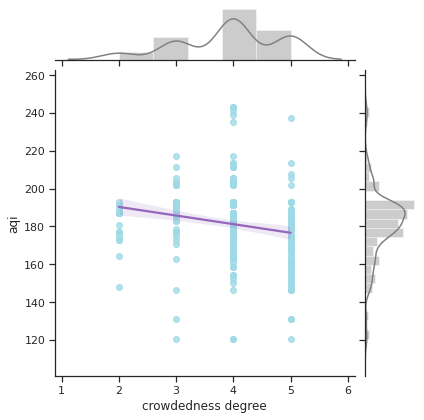

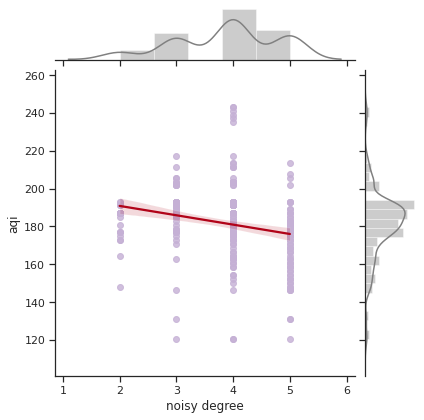

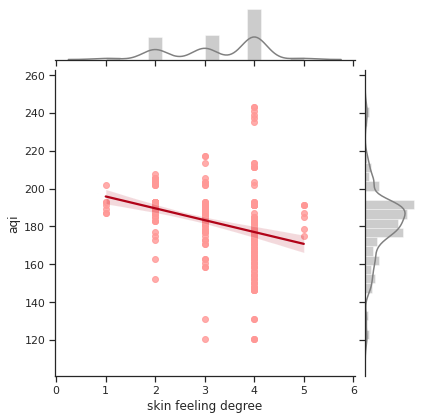

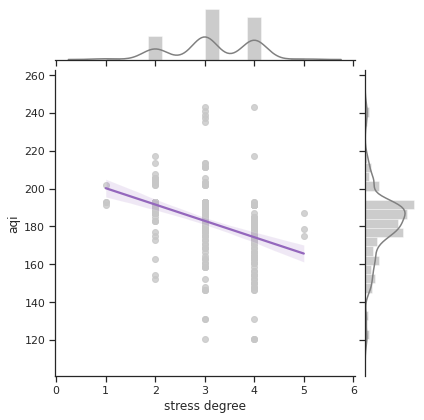

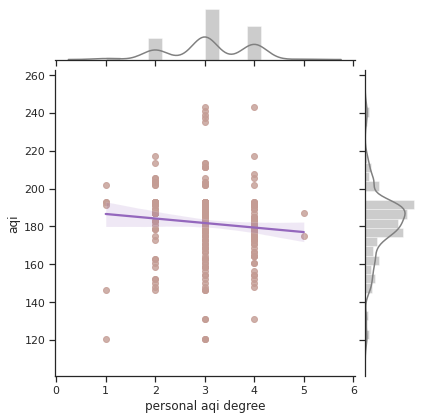

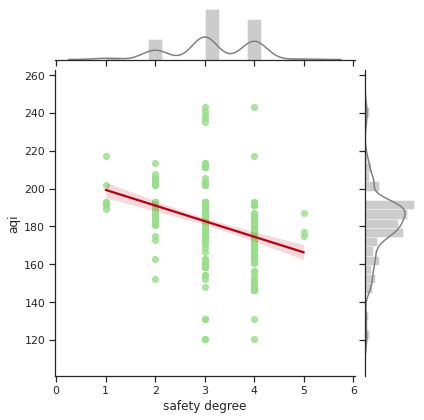

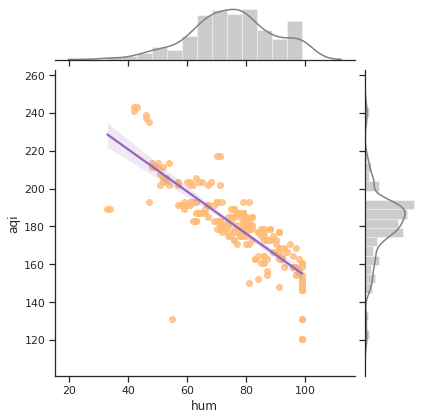

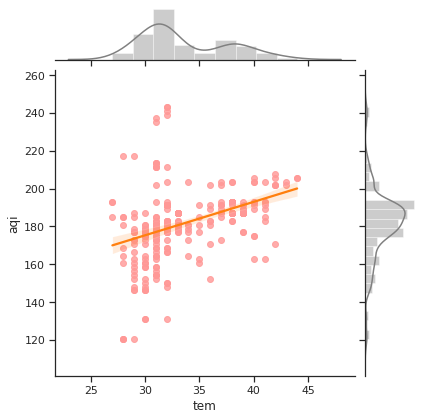

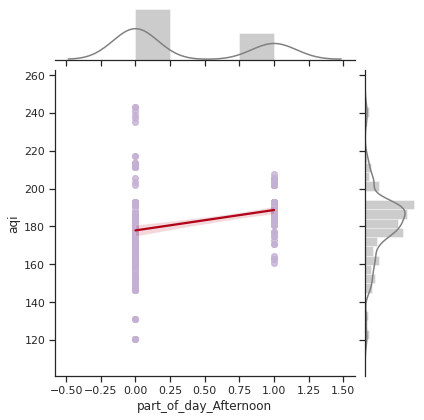

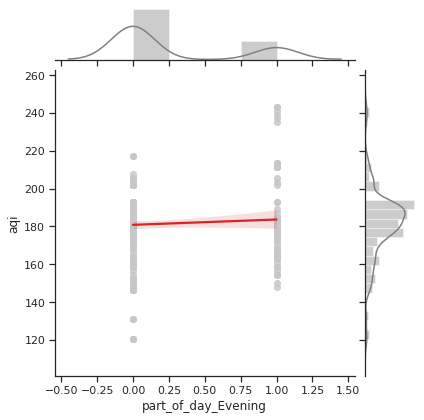

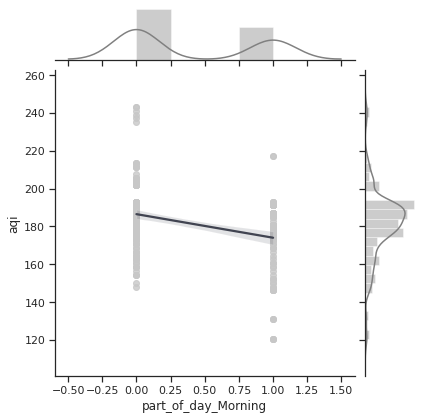

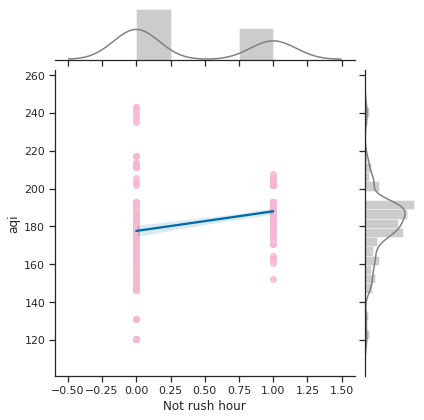

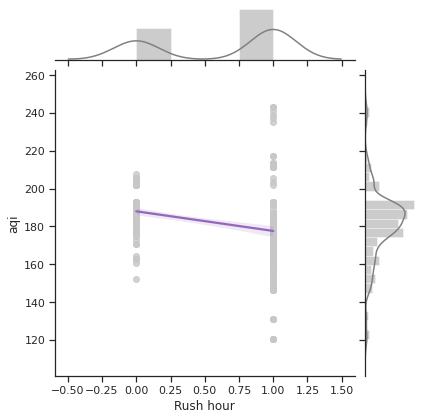

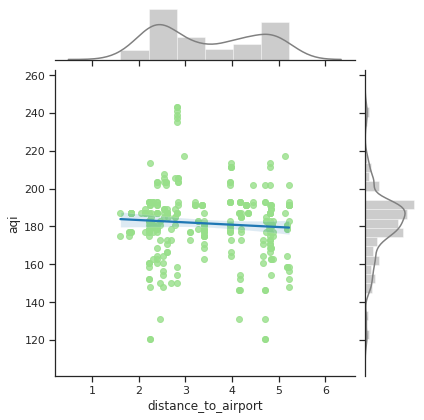

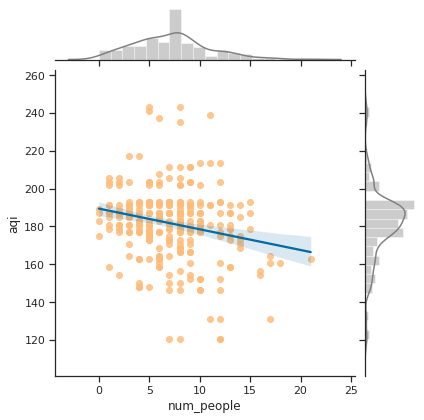

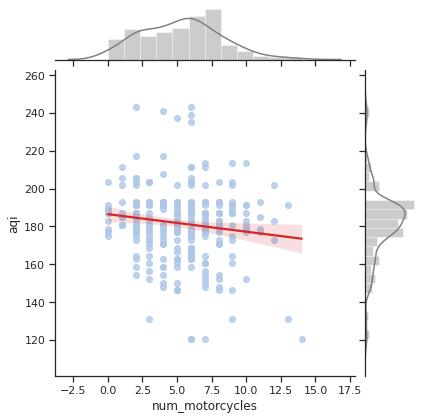

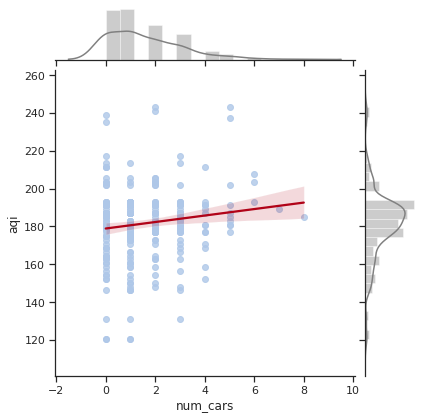

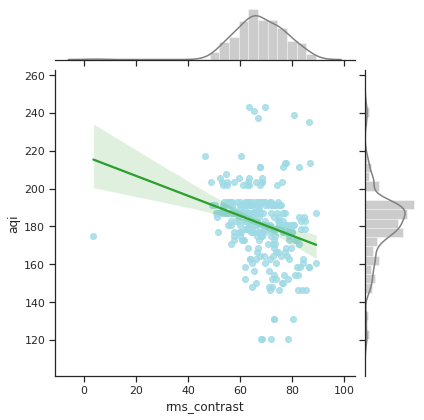

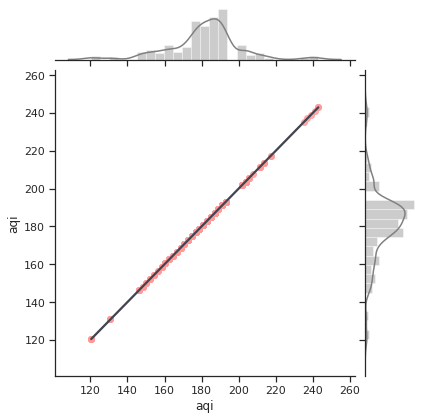

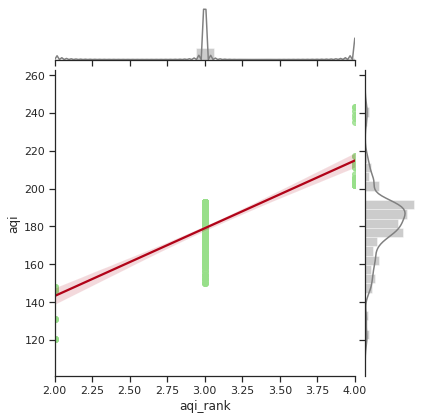

In [19]:
sns.set(style='ticks', color_codes=True)
for i in MNR_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi', data = MNR_merged_data_processed_combine_drop, kind ='reg', color = 'gray',
                  joint_kws={'line_kws':{'color':line_colors[b]}, 
                             'scatter_kws':{'color':scatter_colors[a]}})

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


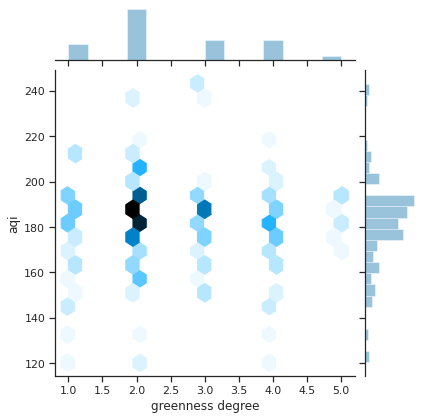

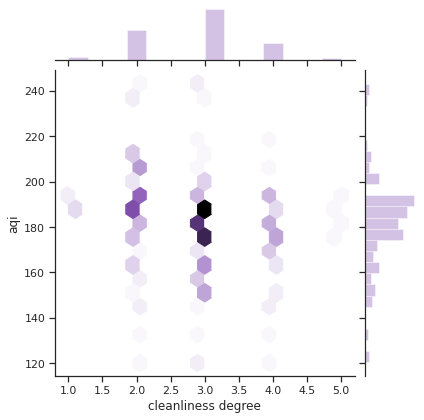

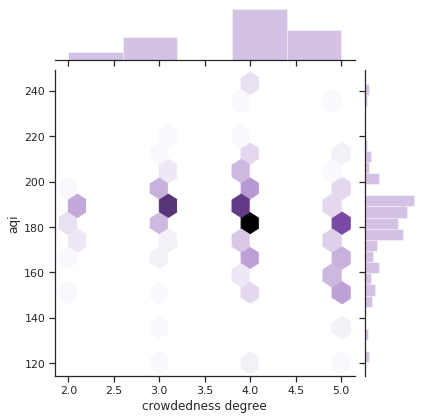

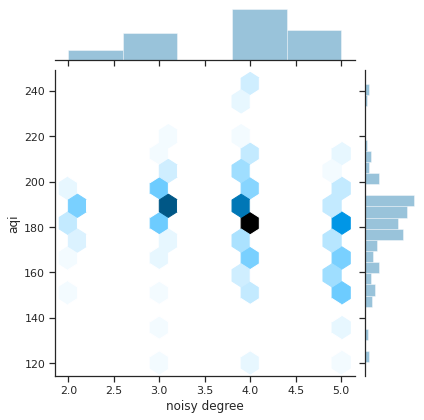

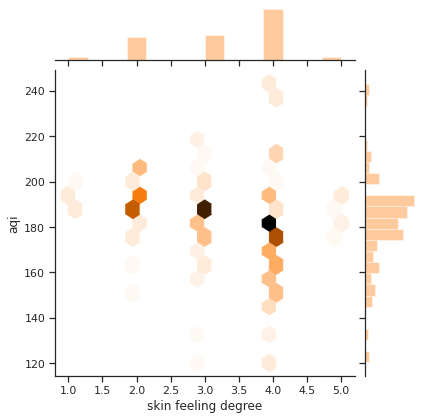

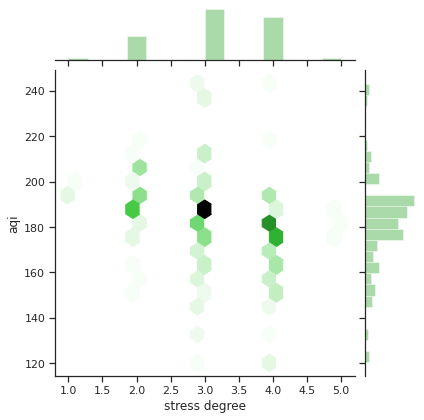

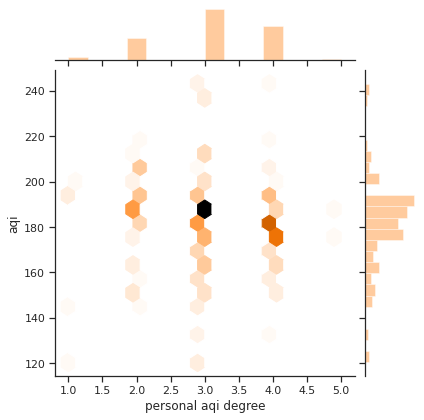

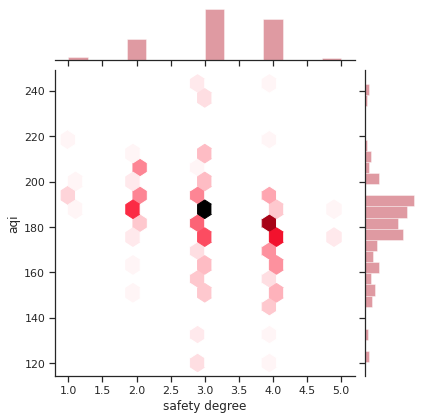

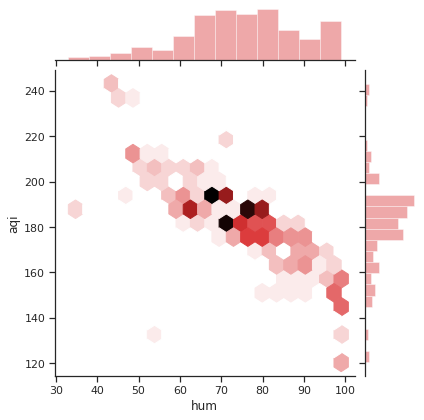

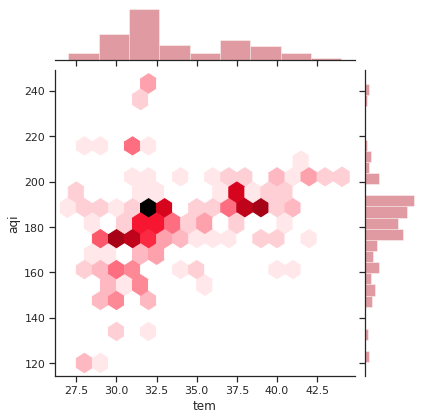

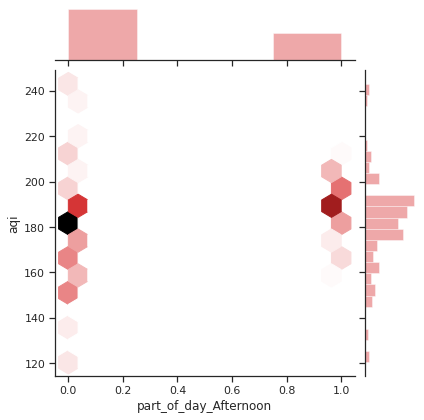

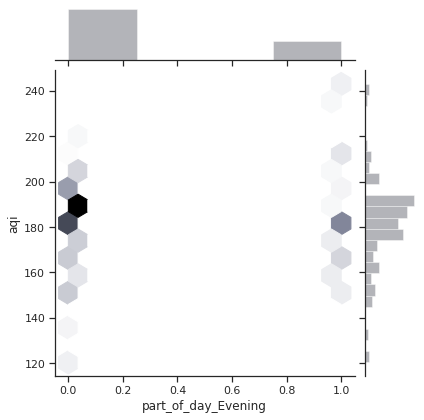

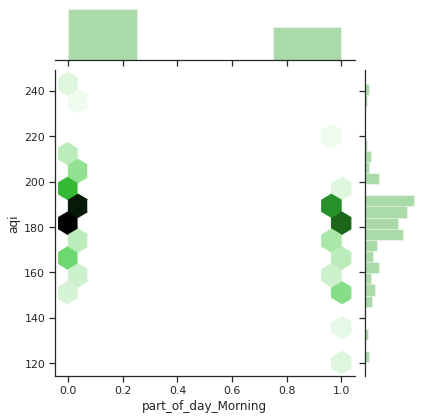

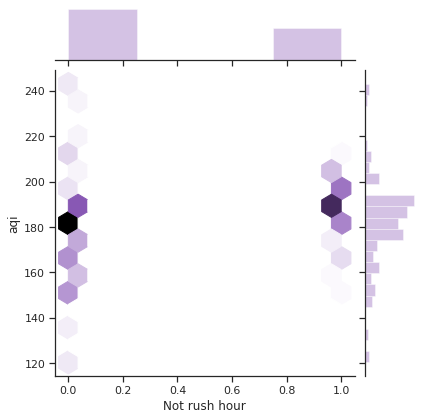

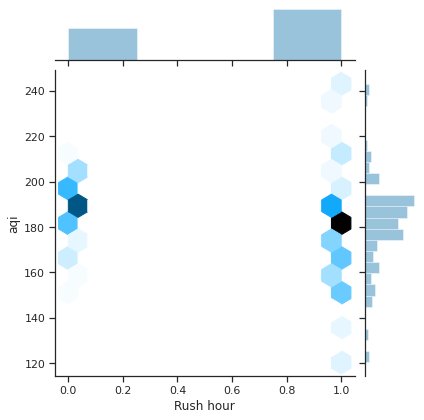

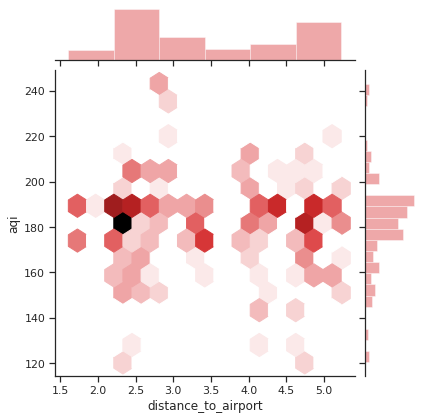

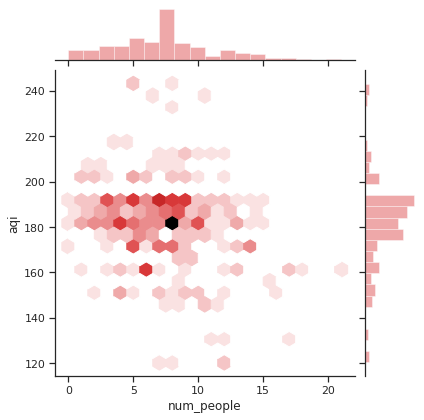

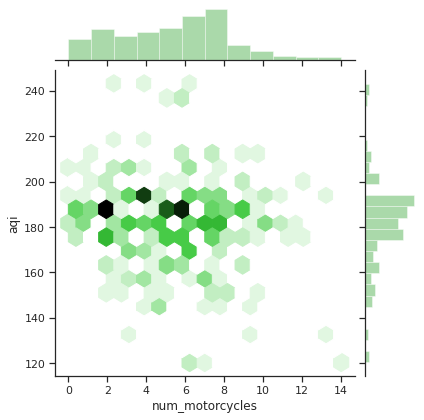

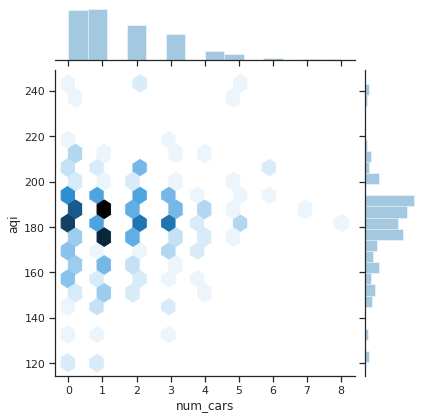

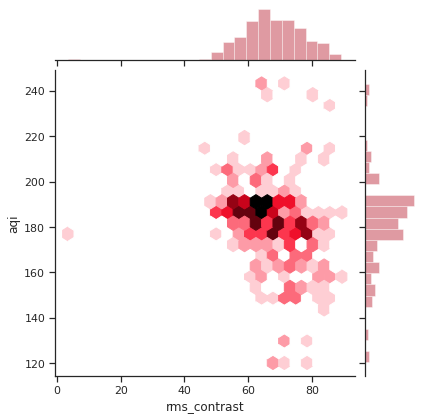

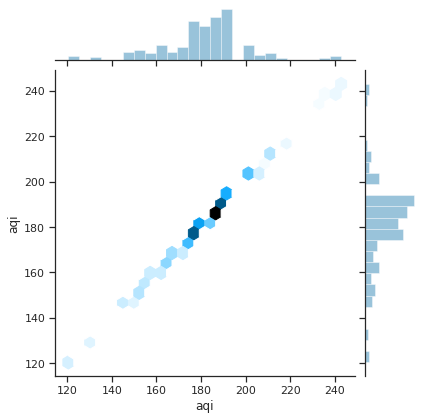

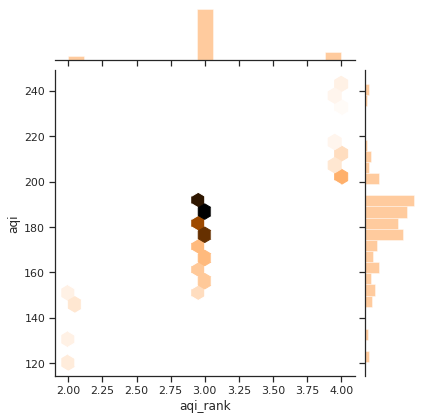

In [20]:
sns.set(style='ticks', color_codes=True)
for i in MNR_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi', data = MNR_merged_data_processed_combine_drop, kind ='hex', color = line_colors[b])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


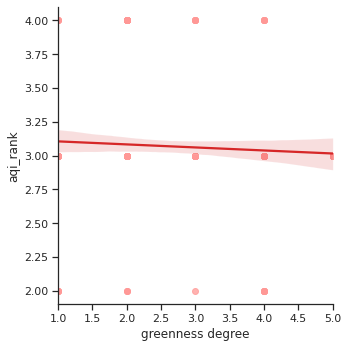

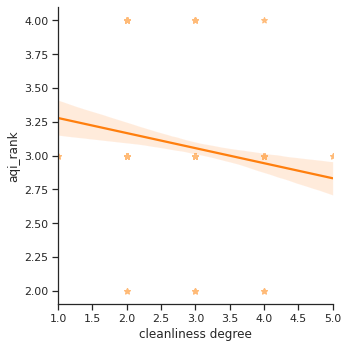

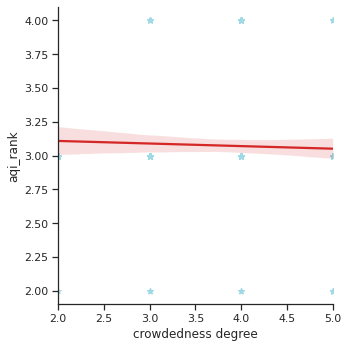

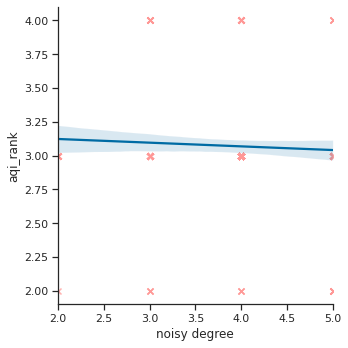

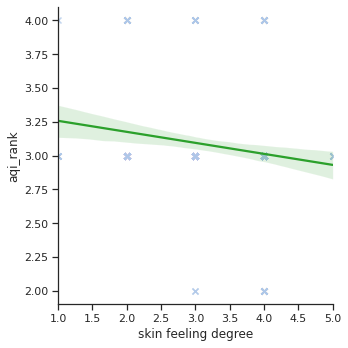

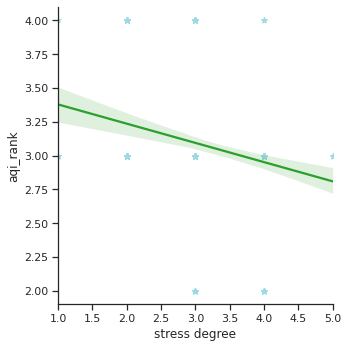

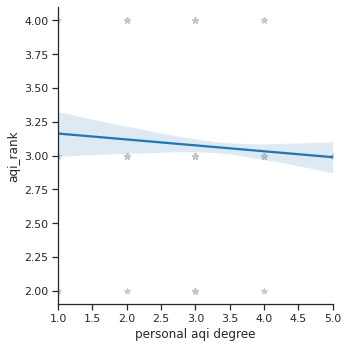

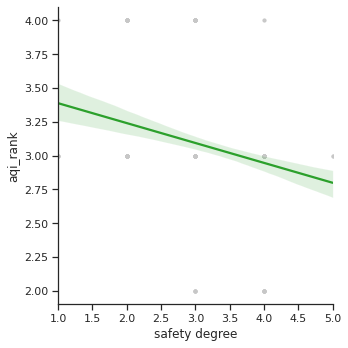

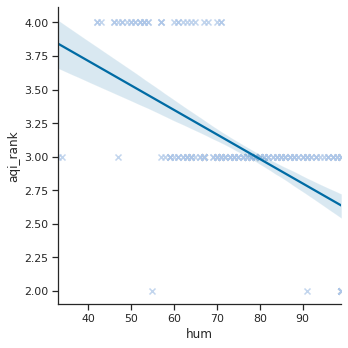

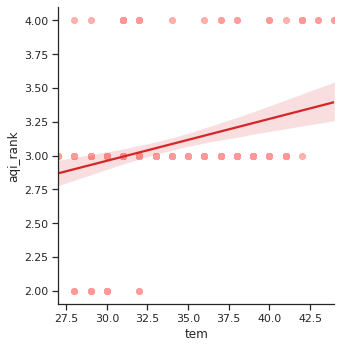

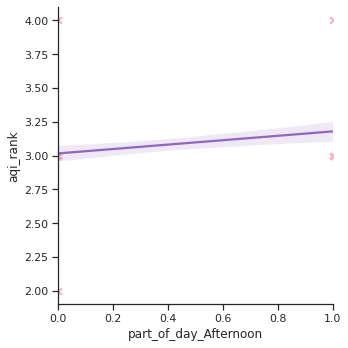

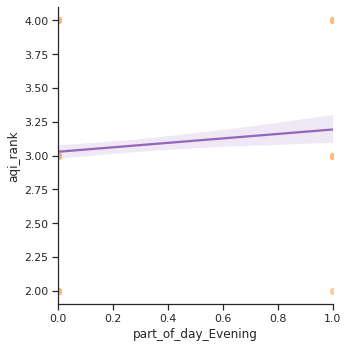

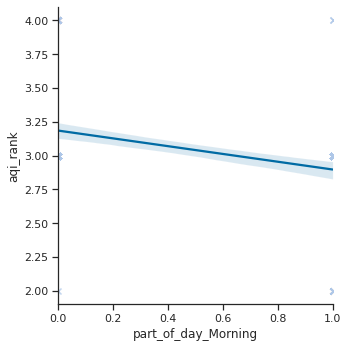

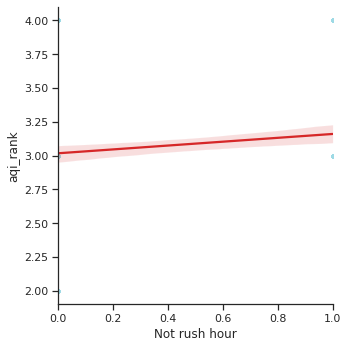

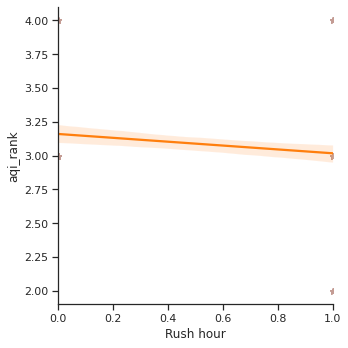

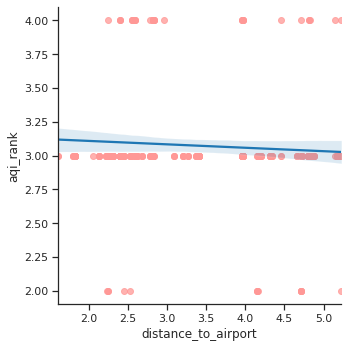

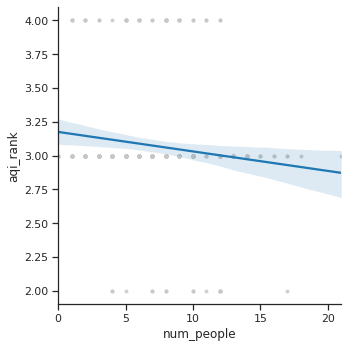

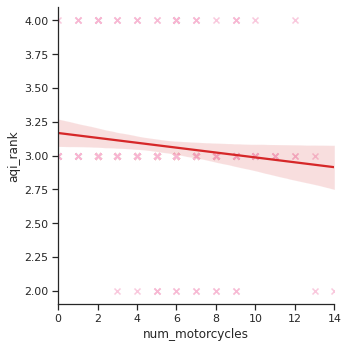

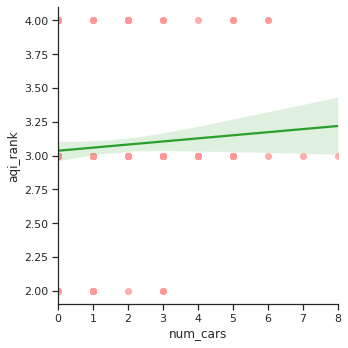

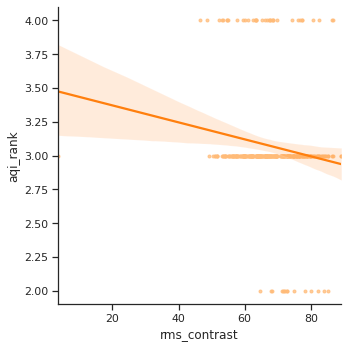

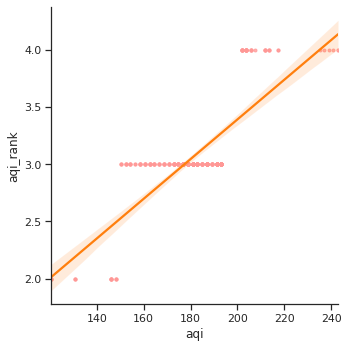

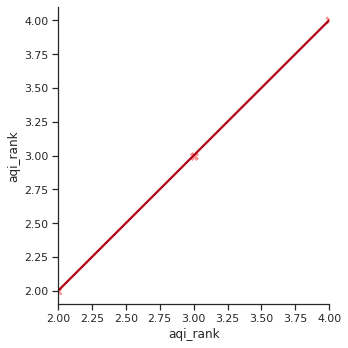

In [21]:
# Visualize linear relationships between each feature and AQI ranks
marker_list = ['x', 'o', '*','.']
sns.set(style='ticks', color_codes=True)
for i in MNR_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1) 
    sns.lmplot(x=i, y='aqi_rank', data = MNR_merged_data_processed_combine_drop, 
               scatter_kws = {'color':scatter_colors[a], 'alpha': 0.75}, line_kws={'color': line_colors[b]}, markers=marker_list[c])


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


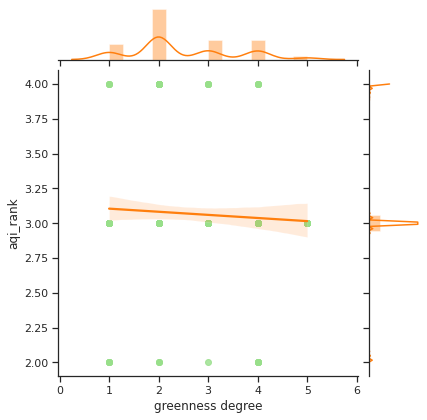

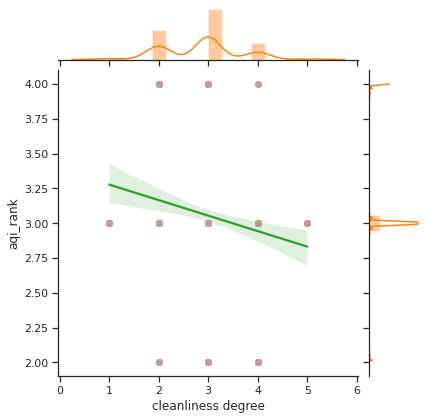

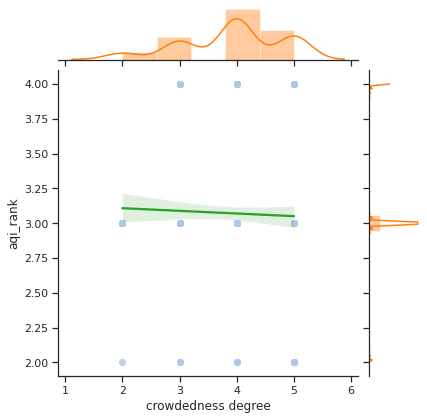

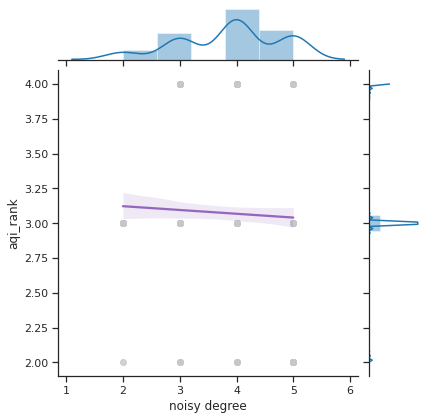

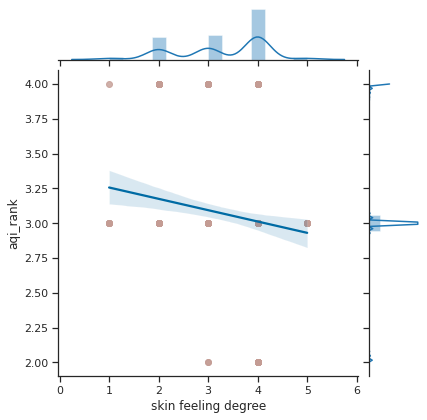

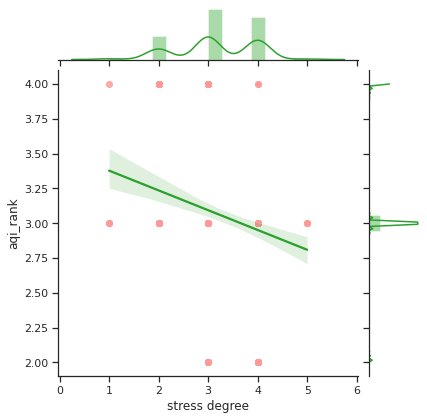

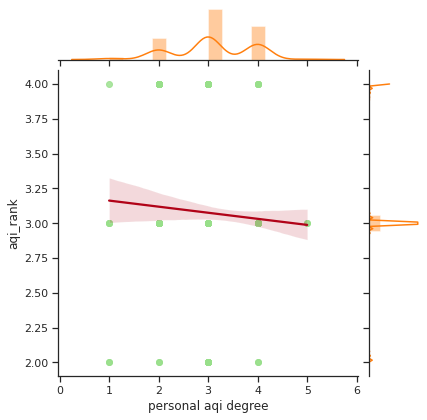

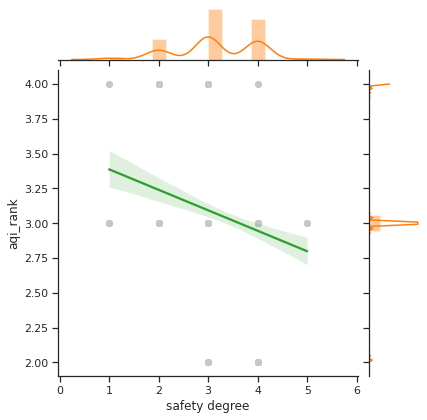

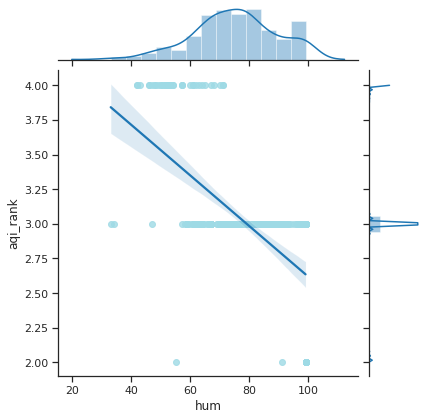

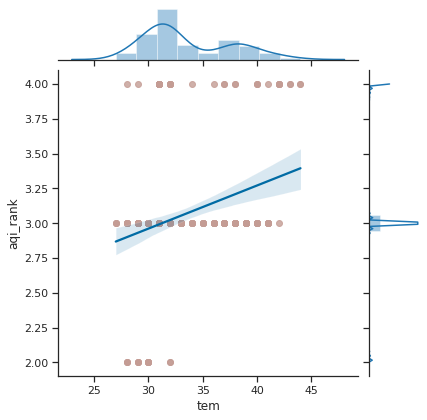

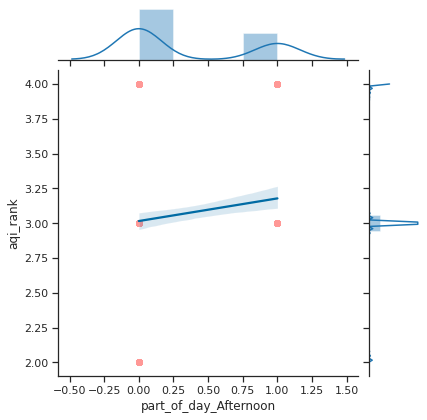

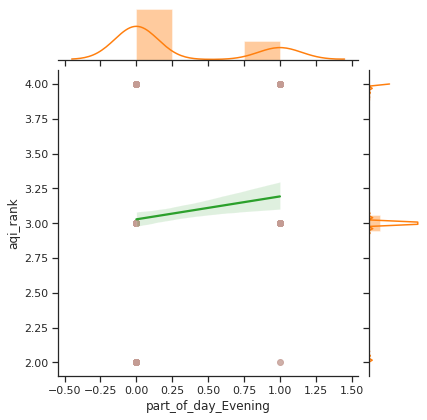

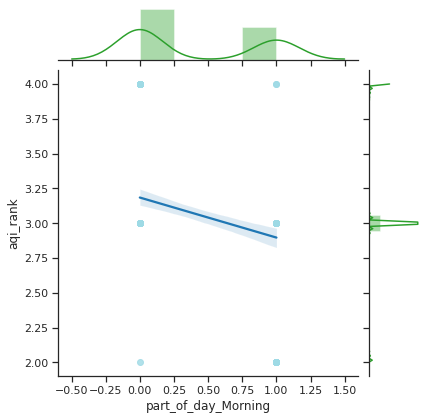

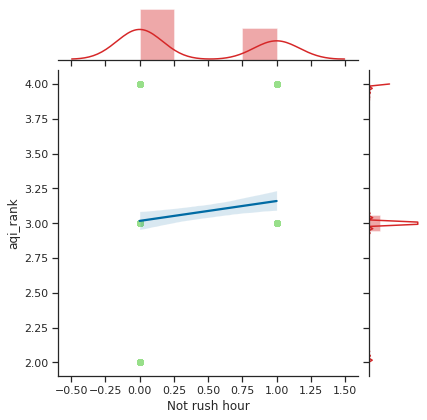

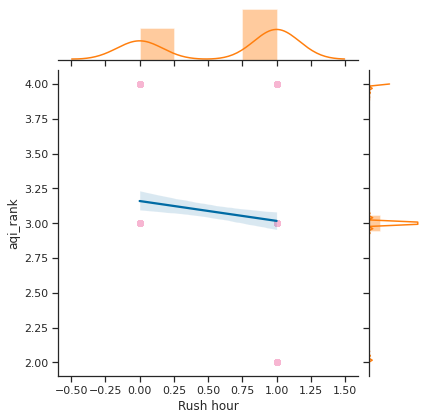

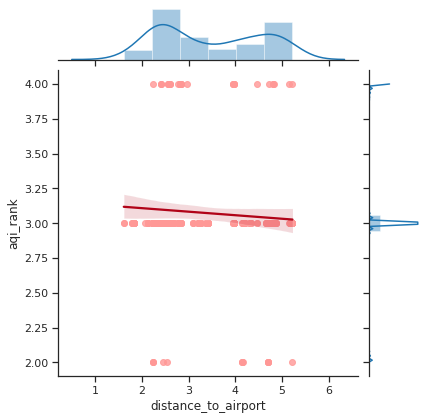

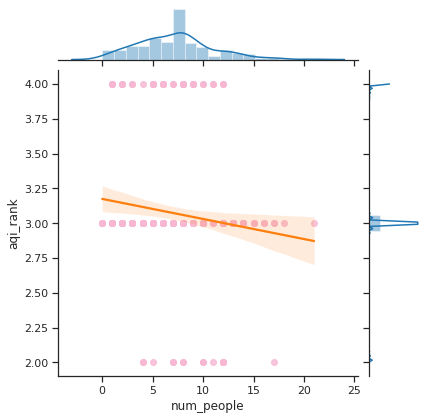

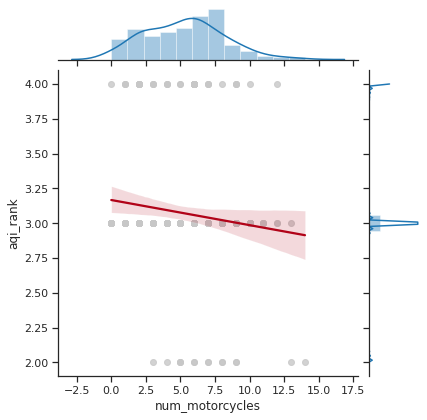

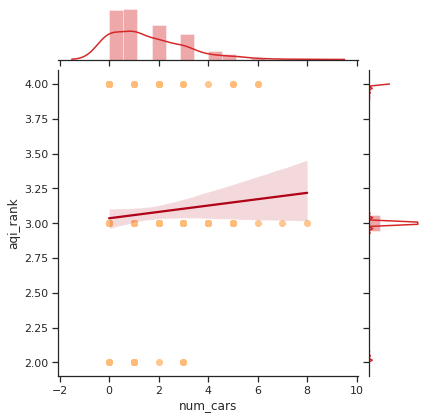

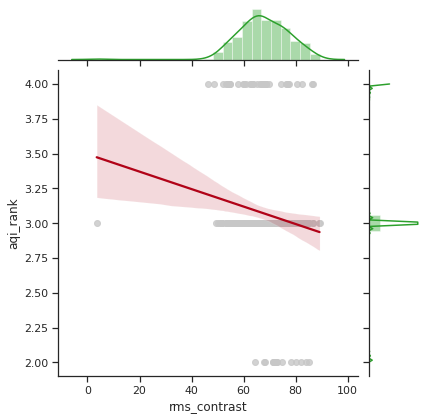

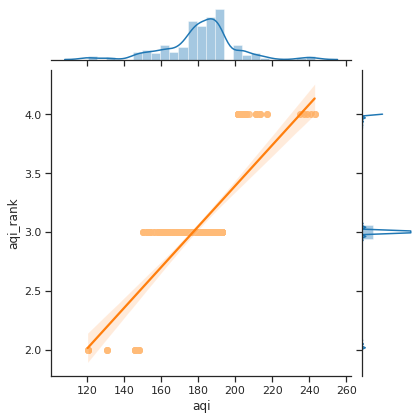

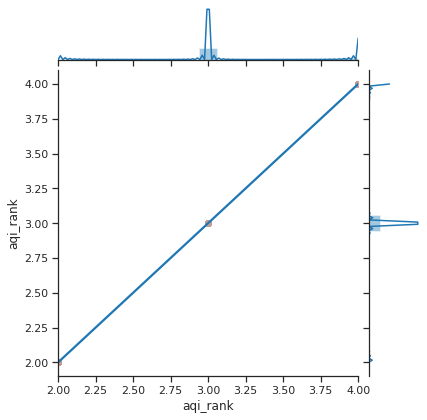

In [22]:
sns.set(style='ticks', color_codes=True)
for i in MNR_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi_rank', data = MNR_merged_data_processed_combine_drop, kind ='reg', color = line_colors[c],
                  joint_kws={'line_kws':{'color':line_colors[b]}, 
                             'scatter_kws':{'color':scatter_colors[a]}})

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1668: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


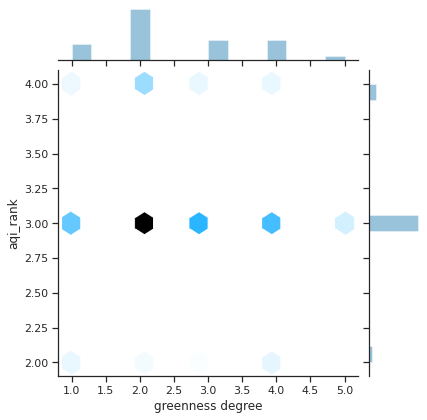

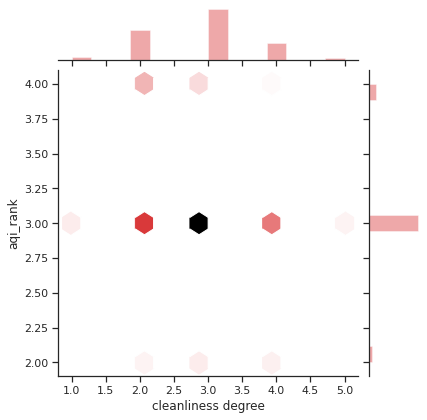

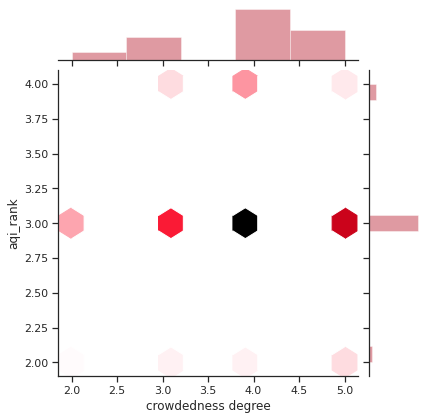

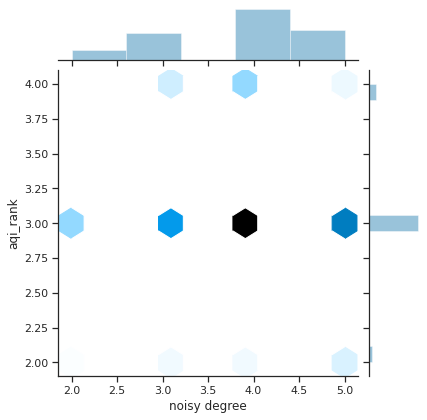

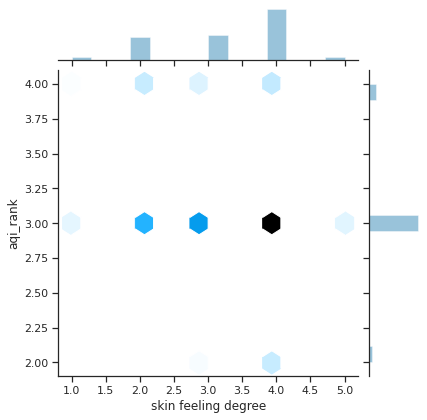

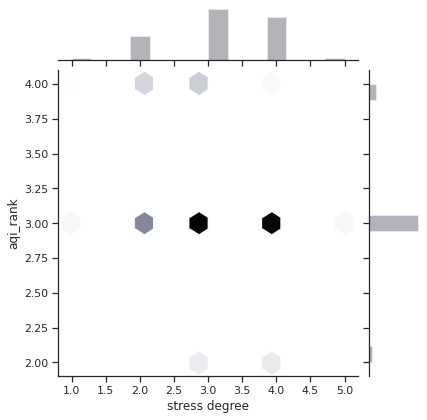

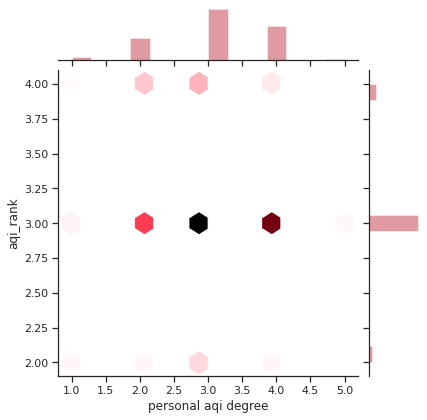

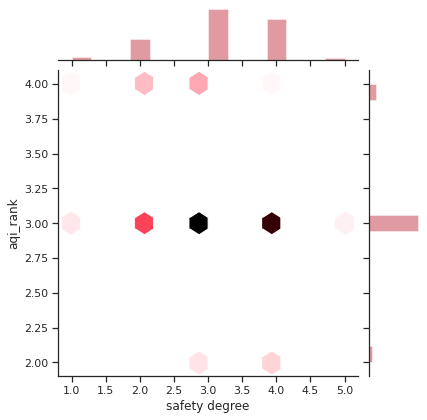

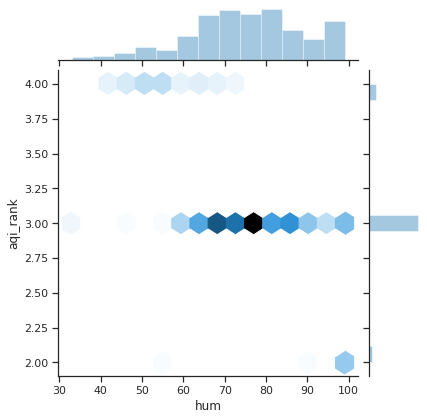

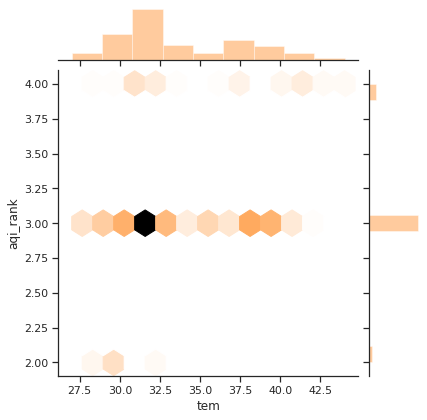

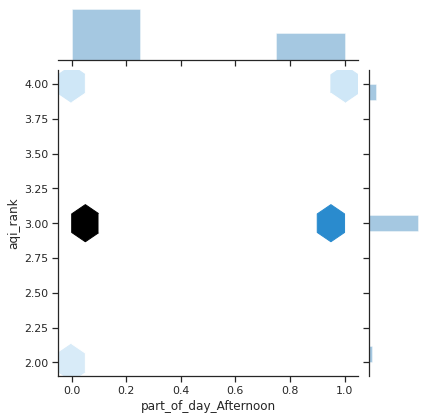

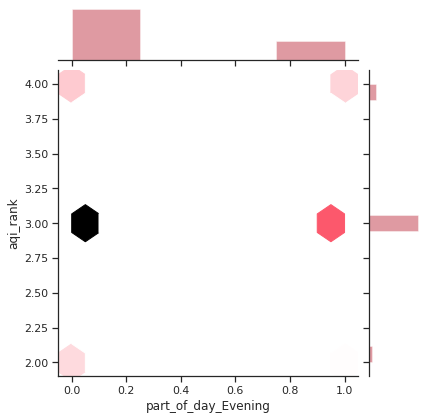

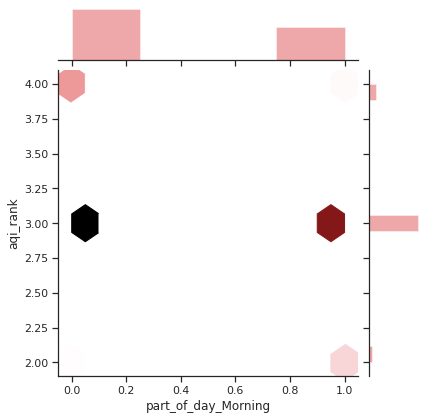

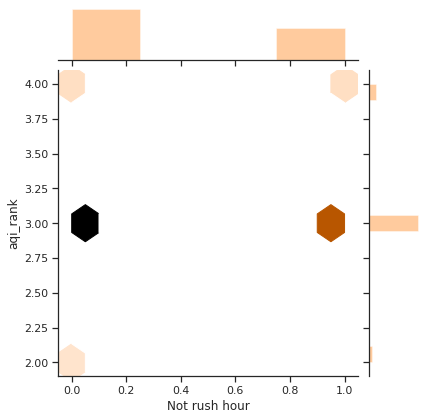

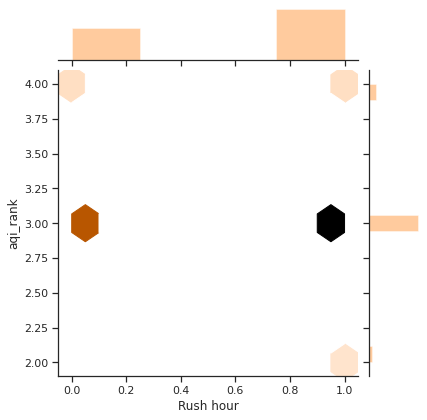

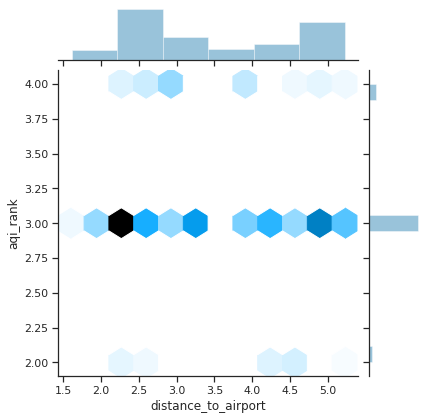

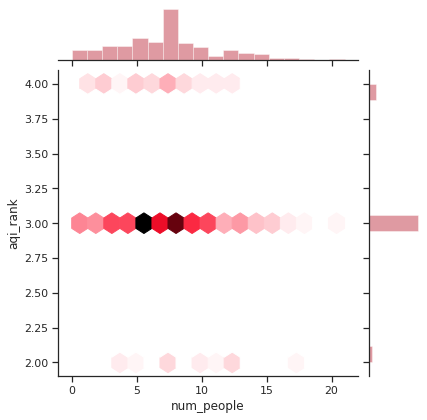

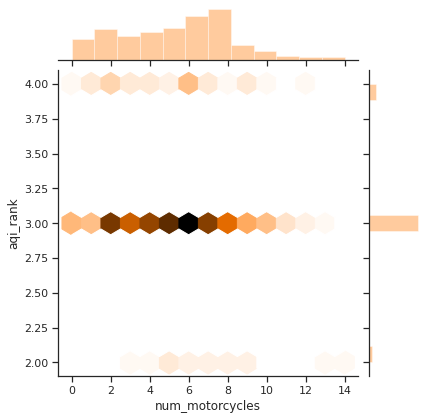

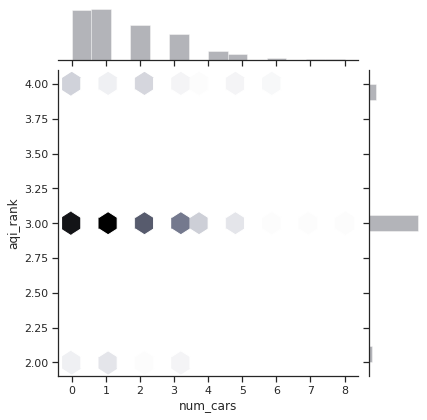

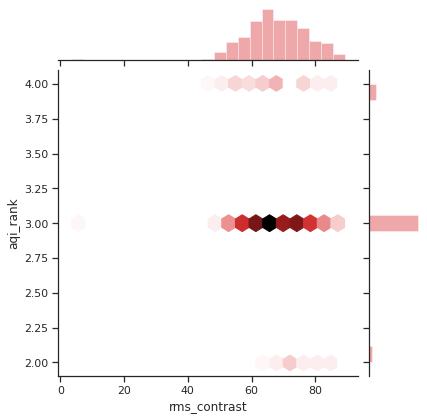

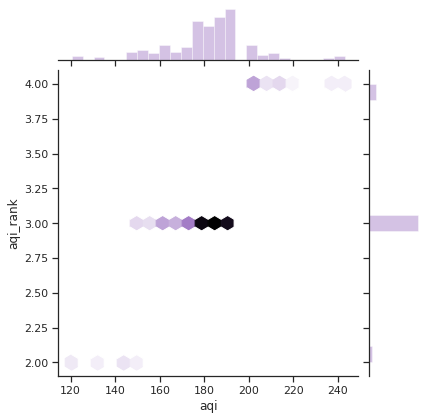

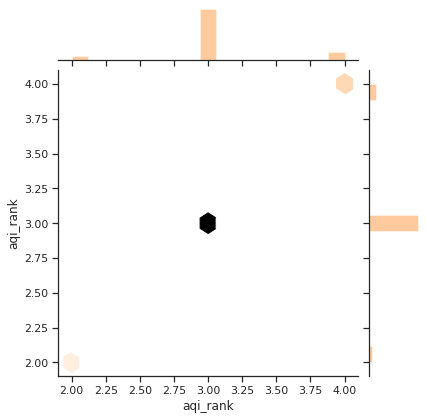

In [23]:
sns.set(style='ticks', color_codes=True)
for i in MNR_merged_data_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi_rank', data = MNR_merged_data_processed_combine_drop, kind ='hex', color = line_colors[b])

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = MNR_merged_data_processed_combine_drop.iloc[:,0:-2] 
y = MNR_merged_data_processed_combine_drop.iloc[:,-2].astype('int64')   
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(5,'Score'))

                 Features       Score
8                     hum  596.868068
19           rms_contrast  127.294783
16             num_people  108.848558
10  part_of_day_Afternoon   79.660010
11    part_of_day_Evening   73.255167


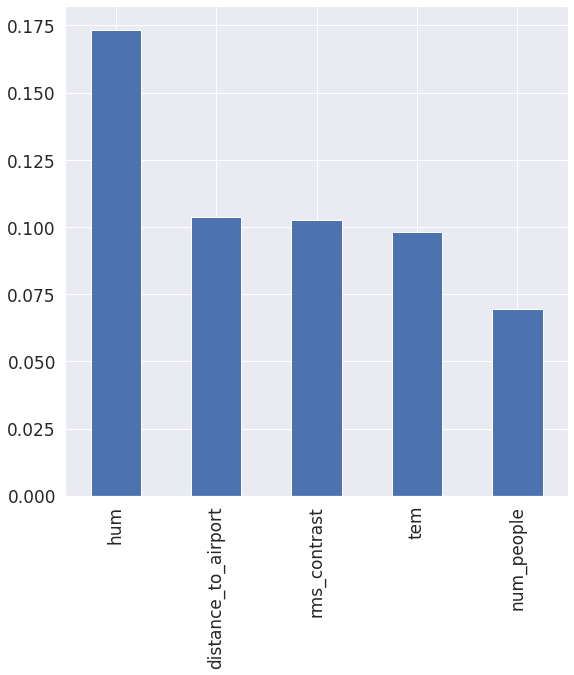

In [47]:

model = RandomForestClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(figsize=(9, 9),kind='bar', fontsize = 17)
